## **Introduction to MNIST Dataset and Classification Problem**
The MNIST dataset is a widely used collection of handwritten digits , commonly used as bench in the field of computer vision, it consists of training set of  60,000  grayscale images of handwritten digits , each dipicting the single digit from 0-9, test set contains 10,000 images. images are vectors of size 28x28 pixels, each pixel value represents the intensity of pixel ranging from 0-255.  
**Classification Problem:**
The MNIST classification problems involves developng a model which learns from the existing data and can predict any digit given as a grayscale image. this falls in the realm of supervised machine learning.





## **Methodology**
Solving the MNIST classification problem require to follow a standard machine learning methodology which includes the data explorartion , cleaning, transformations model implementation and results evaluation each one is discussed here.
### 1. **Dataset Loading and Exploration**
- Dataset loading from tensorflow
- Data exploration to understand the dimensions of the data , number of
samples,  class distribution

#### 2. **Data Preprocessing**
- This step includes the conversion of the pixel values, Normalization is done to scale the pixels from (0-255) to (0-1) ranges, this helps model converge faster.
- Neural network models take specified shape of the data so flatten operation is performed to make the images suitable for feeding to the neural network.
- One hot encoding on the labels is performed which converts each label into 10 dimensional verctor


### 3. **Model Architecture**:
- Desing neural network architecture , start with a baseline model less dense
- choose layers, nodes, assign input and ouput dimesions,
- select an activation function
- add dropout layers

### 4. **Model Compilation**:
- Choose an Optimizer: optimizers are the functions used to train the model for optimal parameters, coomon optimizer includes, 'adam', 'sgd'.
- choose loss function: in case of one hot encoded labels 'categorical_crossentropy'  is suitable
- Evaluation Metrics: evaluation metrics reports the result after each iteration, accuracy will be used as evaluation metrics.


### 5. **Model Training:**
   - Train the model using the training set.
   - Monitor training/validation loss and accuracy to identify potential overfitting or underfitting.
   - Experiment with hyperparameters like the number of epochs and batch size.

### 6. **Hyperparameter Tuning:**
   - Identify hyperparameters to tune, such as learning rate, dropout rate, or layer dimensions.
   - Conduct experiments with different hyperparameter values, utilizing techniques like grid search or random search.

### 7. **Model Evaluation:**
   - Evaluate the trained model on the test set to assess its generalization performance.
   - Examine metrics like accuracy, precision, recall, and confusion matrix.

### 8. **Results and Analysis:**
   - Summarize key findings and performance metrics.
   - Analyze any observed trends, challenges, or improvements needed.

### 9. **Conclusion:**
   - Provide a brief conclusion summarizing the overall process and outcomes.
   - Reflect on the effectiveness of the chosen model architecture and hyperparameters.



### **Implementing The methodology**
#### 1. Data Loading and Exploration

In [1]:
# import necessary libraraies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

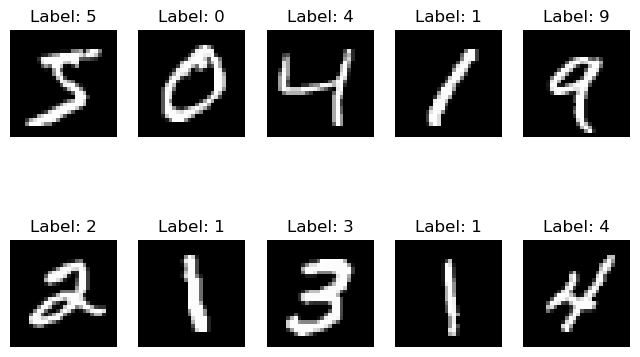

In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Plot sample images
plt.figure(figsize=(8, 5))
for i in range(10):  # Plot the first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

#### 2. Data Preprocessing

In [3]:
# Data preprocessing
# flatten and change the pixel into 0-1 scale
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('train images shape',train_images.shape)
print('train labels shape',train_labels.shape)

train images shape (60000, 784)
train labels shape (60000, 10)


### 3. Model Architecture (Developing a Base Model)
A Base Line Model with small layer network, less hidden units as a baseline model to observe the results.
- Model Compilation
- model training
- Model Evaluation

In [4]:
# define the model arctitecture
model= models.Sequential()
model.add(layers.Dense(100,activation='sigmoid',input_shape=(28*28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
# Model Compilation
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Model Training
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)




Epoch 1/10


375/375 [==============================] - 1s 2ms/step - loss: 2.2762 - accuracy: 0.1804 - val_loss: 1.8959 - val_accuracy: 0.6546
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 1.9064 - accuracy: 0.3510 - val_loss: 1.6027 - val_accuracy: 0.7290
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 1.6543 - accuracy: 0.4700 - val_loss: 1.3675 - val_accuracy: 0.7766
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 1.4573 - accuracy: 0.5465 - val_loss: 1.1828 - val_accuracy: 0.8002
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 1.3056 - accuracy: 0.5982 - val_loss: 1.0413 - val_accuracy: 0.8194
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 1.1902 - accuracy: 0.6352 - val_loss: 0.9329 - val_accuracy: 0.8336
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 1.1020 - accuracy: 0.6608 - val_loss: 0.8501 - val_accuracy: 0.8404
Ep

## Evaluation of results:


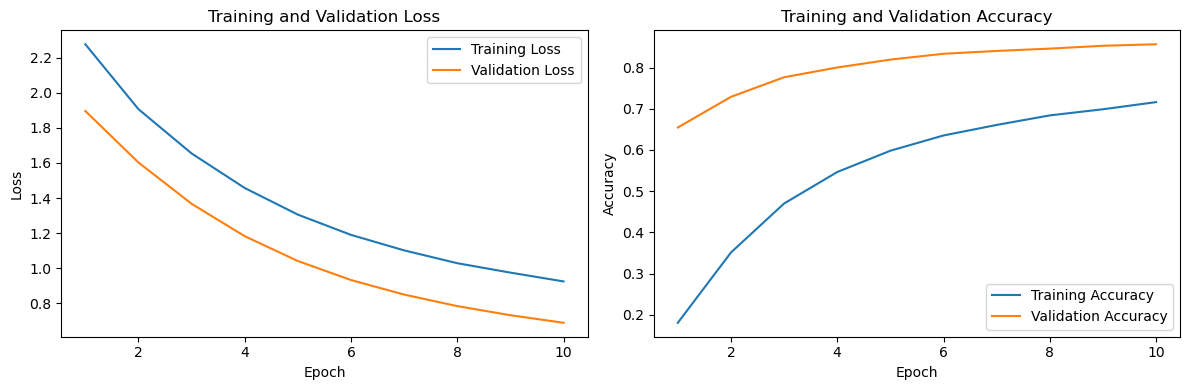

In [5]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extract training history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Plotting the training and validation loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting the training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage
plot_training_history(history)


In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, test_images, test_labels):
    # Predictions on test set
    predictions = model.predict(test_images)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(test_labels, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Display classification report
    print("Classification Report:\n", report)

# Use the function to evaluate the model
evaluate_model(model, test_images, test_labels)


ModuleNotFoundError: No module named 'seaborn'

## Base Model performance was significantly well with 85 percent accuracy on the test set but precision and recall were not upto the mark,  there is a room for the improvement as there are many false predictions which can be seen on the confusion matrix , we will implement multilayered network with more layers.

## Model2: Multilayered Dense Model with large hidden units Relu activation

In [ ]:
# define the model arctitecture
model = models.Sequential()
model.add(layers.Dense(256,activation='relu' , input_shape=(28*28,)))  # Flatten the 28x28 images into a 1D array

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Model Compilation
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Model Training
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 1.3602 - accuracy: 0.6574 - val_loss: 0.6006 - val_accuracy: 0.8527
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.4942 - accuracy: 0.8677 - val_loss: 0.3828 - val_accuracy: 0.8947
Epoch 3/10
375/375 [==============================] - 4s 12ms/step - loss: 0.3699 - accuracy: 0.8964 - val_loss: 0.3197 - val_accuracy: 0.9087
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.3193 - accuracy: 0.9094 - val_loss: 0.2876 - val_accuracy: 0.9165
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2888 - accuracy: 0.9176 - val_loss: 0.2657 - val_accuracy: 0.9235
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2662 - accuracy: 0.9239 - val_loss: 0.2495 - val_accuracy: 0.9281
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2482 - accuracy: 0.9286 - val_loss: 0.2347 - val_accuracy: 0.9314
E

## Hperparamter Tuning

In [ ]:
!pip install keras-tuner -q


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape data to be fed into a dense layer
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

In [ ]:
# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Tune the number of units in the first dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(28 * 28,)))

    # Add dropout layer for regularization
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Tune the number of units in the second dense layer
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))

    # Output layer with 10 units for 10 classes (0-9)
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the RandomSearch tuner
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='tune_results', project_name='mnist_tuning')

In [ ]:
# Perform hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_split=0.2)

Trial 5 Complete [00h 01m 47s]
val_accuracy: 0.9715833266576132

Best val_accuracy So Far: 0.9778333306312561
Total elapsed time: 00h 15m 29s


In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

In [ ]:
# Train the model with the best hyperparameters
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2358 - accuracy: 0.9279 - val_loss: 0.1087 - val_accuracy: 0.9664
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1089 - accuracy: 0.9661 - val_loss: 0.0995 - val_accuracy: 0.9687
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0835 - accuracy: 0.9739 - val_loss: 0.1027 - val_accuracy: 0.9715
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0660 - accuracy: 0.9791 - val_loss: 0.0971 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.0887 - val_accuracy: 0.9756
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0492 - accuracy: 0.9839 - val_loss: 0.0944 - val_accuracy: 0.9742
Epoch 7/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.0886 - val

In [ ]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0783 - accuracy: 0.9803
Test accuracy: 0.9803000092506409


In [ ]:
# Print the values of the best hyperparameters
print("Best Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Units_2: {best_hps.get('units_2')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

Best Hyperparameters:
Units: 384
Dropout Rate: 0.2
Units_2: 384
Learning Rate: 0.001


In [ ]:
# Predict probabilities for the test set
predicted_probabilities = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [ ]:
# Get predicted labels by selecting the class with the highest probability
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

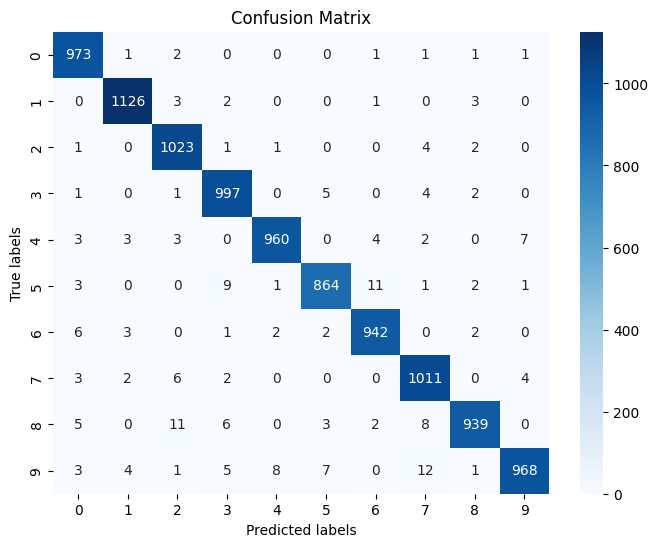

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Evaluation of the best Models

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 384)               301440    
                                                                 
 dropout_1 (Dropout)         (None, 384)               0         
                                                                 
 dense_4 (Dense)             (None, 384)               147840    
                                                                 
 dense_5 (Dense)             (None, 10)                3850      
                                                                 
Total params: 453130 (1.73 MB)
Trainable params: 453130 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Save the best model
model.save("best_model.h5")


# **Results:**
**Hyperparameter Tuning Results:**


After conducting hyperparameter tuning using Random Search, the best validation accuracy achieved during the search was approximately **97.78%**.

The final test accuracy after fine-tuning the model was found to be **98.03%**.

**Best Hyperparameters:**
- Units: 384
- Dropout Rate: 0.2
- Units_2: 384
- Learning Rate: 0.001

# **Conclusion:**
The Random Search hyperparameter tuning technique successfully identified optimal hyperparameters for the neural network model used in classifying handwritten digits from the MNIST dataset. The best-performing model had a validation accuracy of **97.78%** and achieved a commendable test accuracy of **98.03%** after fine-tuning.

The selected hyperparameters for the model configuration included **384** units in each of the two dense layers, a dropout rate of **0.2** for regularization, and a learning rate of **0.001** for the Adam optimizer.

This outcome demonstrates the effectiveness of Random Search in efficiently exploring the hyperparameter space, leading to a significantly improved model accuracy for the task of handwritten digit classification.